In [16]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import msgpack
import msgpack_numpy as m
m.patch()
from functions import *

In [17]:
# Data loading

# All the data are stored in dictionaries whose keys are quite self-explanatory

with open("data_folder/dim_10k.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    dim10_com = msgpack.unpackb(byte_data) #data for Fig. 9 (upper left) and Fig. 10 (upper left)
    
with open("data_folder/dim_500k.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    dim500_com = msgpack.unpackb(byte_data) #data for Fig. 9 (upper right) and Fig. 10 (upper right)
    
with open("data_folder/dim_10k_overC.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    dim10_Ovcom = msgpack.unpackb(byte_data) #data for Fig. 9 (lower left) and Fig. 10 (lower left)
    
with open("data_folder/dim_500k_overC.msgpack", "rb") as data_file: 
    byte_data = data_file.read()
    dim500_Ovcom = msgpack.unpackb(byte_data) #data for Fig. 9 (lower right) and Fig. 10 (lower right)
    
with open("data_folder/shotNoise_histogram.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    shotNoisehistDic = msgpack.unpackb(byte_data) #data for Fig. 1  
    
with open("data_folder/shotNoise.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    shotNoiseDic = msgpack.unpackb(byte_data) #data for Fig. 2 
       
with open("data_folder/SDP_cluster.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSDP = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False) 
    #data for the Pauli eigenstates in Fig. 3 

with open("data_folder/SDP_randomPOVM.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSDPrandomPOVM = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for the Pauli eigenstates and random POVMs in Fig. 3
    
with open("data_folder/SDP_clusterSDP4.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSDP4 = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for 4 random input states in Fig. 3 

with open("data_folder/SDP_clusterSDP6.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSDP6 = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for 6 random input states in Fig. 3 
 
with open("data_folder/manyDeltas.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    manyDeltasDic = msgpack.unpackb(byte_data) #data for Fig. 4 
     
with open("data_folder/SDP_cluster-seesaw4.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSeesaw4 = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for 4 random input states in Fig. 5
   
with open("data_folder/SDP_cluster-seesaw6.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSeesaw6 = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for 6 random input states in Fig. 5

with open("data_folder/SDP_cluster-seesawPauli.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSeesawPauli = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for the Pauli eigenstates and SIC-POVM in Figs. 5 and 6

#data for the Pauli eigenstates and SIC-POVM in Figs. 5 and 6:   
with open("data_folder/SDP_seesaw_randomPOVM.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSeesawrandomPOVM = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)     
with open("data_folder/SDP_seesaw_randomPOVM_bis.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSeesawrandomPOVMbis = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False) 
with open("data_folder/SDP_seesaw_randomPOVM_tris.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    clusterSeesawrandomPOVMtris = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False) 
      
    
with open("data_folder/seesaw_CV_pauli.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    seesaw_CV_pauli = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for the Pauli eigenstates and SIC-POVM in Figs. 7 and 8

with open("data_folder/seesaw_CV_randomPOVM.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    seesaw_CV_randomPOVM = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for the Pauli eigenstates and random POVMs in Figs. 7 and 8
    
with open("data_folder/seesaw_CV_4rand.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    seesaw_CV_4rand = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for 4 random input states in Figs. 7 and 8
    
with open("data_folder/seesaw_CV_6rand.msgpack", "rb") as data_file:
    byte_data = data_file.read()
    seesaw_CV_6rand = msgpack.unpackb(byte_data, use_list=False, strict_map_key=False)
    #data for 6 random input states in Figs. 7 and 8

# We create a single dictionary for see-saw with random POVMs    
SeesawRandomDict = {}
SeesawRandomDict['seesaw'] = {}
SeesawRandomDict['seesaw']['randomPOVM'] = {}
for keys in ['coherent','incoherent']:
    SeesawRandomDict['seesaw']['randomPOVM'][keys]= {}
    for noiseValues in [0.0,0.01,0.05,0.1]:
        SeesawRandomDict['seesaw']['randomPOVM'][keys][noiseValues] = np.zeros((100,100))
        
for key in clusterSeesawrandomPOVMbis['seesaw']['randomPOVM'].keys():
    for noiseValue , res_items in clusterSeesawrandomPOVMbis['seesaw']['randomPOVM'][key].items():
        for jj in range(30):
            for kk in range(100):
                SeesawRandomDict['seesaw']['randomPOVM'][key][noiseValue][jj+30,kk]=res_items[jj,kk]
    for noiseValue , res_items in clusterSeesawrandomPOVM['seesaw']['randomPOVM'][key].items():
        for jj in range(30):
            for kk in range(100):
                SeesawRandomDict['seesaw']['randomPOVM'][key][noiseValue][jj,kk]=res_items[jj,kk]

    for noiseValue , res_items in clusterSeesawrandomPOVMtris['seesaw']['randomPOVM'][key].items():
        for jj in range(40):
            for kk in range(100):
                SeesawRandomDict['seesaw']['randomPOVM'][key][noiseValue][jj+60,kk]=res_items[jj,kk]



In [18]:
# Plots layout 

SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 22
TINY_SIZE = 14

plt.rc('font', size=SMALL_SIZE)   # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=TINY_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

Text(0, 0.5, 'Frequency (100 experiments)')

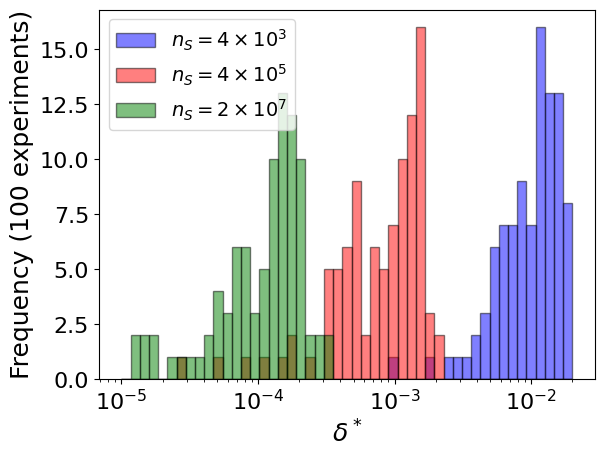

In [19]:
#Generate Figure 1

binwidth = 0.00001
plt.hist(shotNoisehistDic['1000'], color = 'blue', alpha=0.5, edgecolor = 'black',
         bins =10 ** np.linspace(np.log10(0.00001), np.log10(0.02), 50), label=r'$n_S=4\times 10^3$');
plt.hist(shotNoisehistDic['100000'], color = 'red', alpha=0.5, edgecolor = 'black',       
         bins =10 ** np.linspace(np.log10(0.00001), np.log10(0.02), 50), label=r'$n_S=4\times 10^5$');
plt.hist(shotNoisehistDic['5000000'], color = 'green', alpha=0.5, edgecolor = 'black',    
         bins = 10 ** np.linspace(np.log10(0.00001), np.log10(0.02), 50), label=r'$n_S=2\times 10^7$');

plt.legend(loc='upper left')
plt.xscale('log')

plt.xlabel(r'$\delta^*$')
plt.ylabel('Frequency (100 experiments)')

#Save the figure as:
#plt.savefig('deltaFrequencies_vsnS.pdf',bbox_inches='tight') 

Text(0.5, 0, '$n_S$')

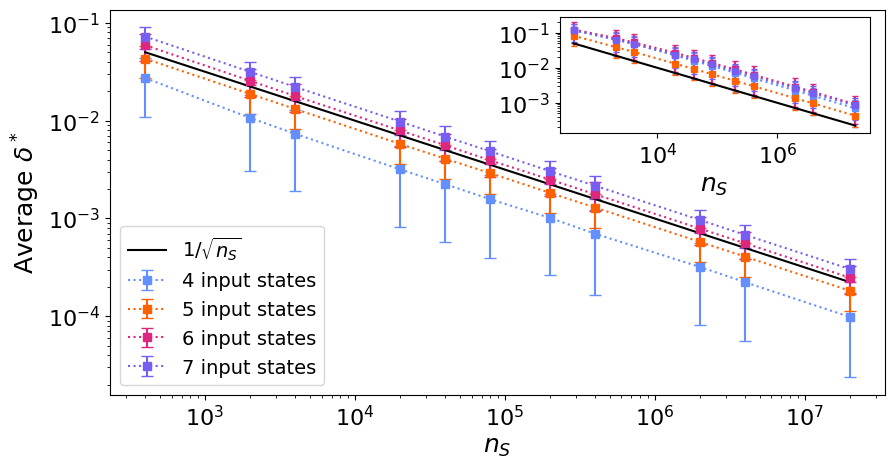

In [20]:
#Generate Figure 2

fig, ax = plt.subplots()
fig.set_size_inches(10, 5)

num_shots_vector = np.array([100,500,1000,5000,10000,20000,50000,100000,500000,1000000,5000000])*4

scaling_vec = np.zeros(len(num_shots_vector))
for jj in range(len(num_shots_vector)):
    scaling_vec[jj]=1/np.sqrt(num_shots_vector[jj])

labellist = ['4 input states','5 input states','6 input states','7 input states']
colorlist = ['#648fff','#fe6100','#dc267f','#785ef0']

for mm in range(4): # Plots for different numbers of input states (main plot)
    plt.errorbar(num_shots_vector,np.mean(shotNoiseDic['delta'],axis=(2,3))[mm,:],np.std(shotNoiseDic['delta'],axis=(2,3))[mm,:],color=colorlist[mm],marker='s',ls = ':',capsize=4,label=labellist[mm])
plt.plot(num_shots_vector,scaling_vec,color='black',label=r'$1/\sqrt{n_S}$ ') # Theoretical scaling

plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower left')
ax.set_xlabel(r'$n_S$')
ax.set_ylabel(r'Average $\delta^*$')

# Inset
ax2 = plt.axes([0,0,1,1])
# Manually set the position and relative size of the inset axes within ax1
ip = InsetPosition(ax, [0.58,0.68,0.4,0.3])
ax2.set_axes_locator(ip)

for mm in range(4):
    ax2.errorbar(num_shots_vector,np.mean(shotNoiseDic['trace'],axis=(2,3,4))[mm,:],np.std(shotNoiseDic['trace'],axis=(2,3,4))[mm,:],color=colorlist[mm],marker='s',ls = ':',capsize=2,markersize=5,label=labellist[mm])
ax2.plot(num_shots_vector,scaling_vec,color='black',label=r'$1/\sqrt{n_S}$ ')

ax2.set_xscale('log')
ax2.set_yscale('log')


ax2.set_xlabel(r'$n_S$')

#Save the figure as:
#plt.savefig('delta_av.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Average $\\delta^*$')

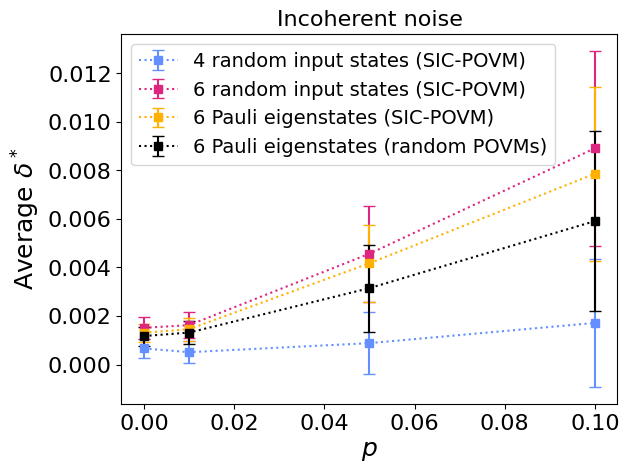

In [21]:
#Generate Figure 3 (left)

pvec = [0.0,0.01,0.05,0.1]

p4st = [np.mean(clusterSDP4['SDP']['4random']['incoherent'][key]) for key in pvec]
p4st_std = [np.std(clusterSDP4['SDP']['4random']['incoherent'][key]) for key in pvec]
p6st = [np.mean(clusterSDP6['SDP']['6random']['incoherent'][key]) for key in pvec]
p6st_std = [np.std(clusterSDP6['SDP']['6random']['incoherent'][key]) for key in pvec]
pPauli = [np.mean(clusterSDP['SDP']['Pauli']['incoherent'][key]) for key in pvec]
pPauli_std = [np.std(clusterSDP['SDP']['Pauli']['incoherent'][key]) for key in pvec]
pRandom = [np.mean(clusterSDPrandomPOVM['SDP']['randomPOVM']['incoherent'][key]) for key in pvec]
pRandom_std = [np.std(clusterSDPrandomPOVM['SDP']['randomPOVM']['incoherent'][key]) for key in pvec]

plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states (SIC-POVM)')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states (SIC-POVM)')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates (SIC-POVM)')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates (random POVMs)')

plt.title('Incoherent noise')

plt.legend()
plt.xlabel(r'$p$')
plt.ylabel(r'Average $\delta^*$')

#Save the figure as:
#plt.savefig('delta_av_p_incoherent.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Average $\\delta^*$')

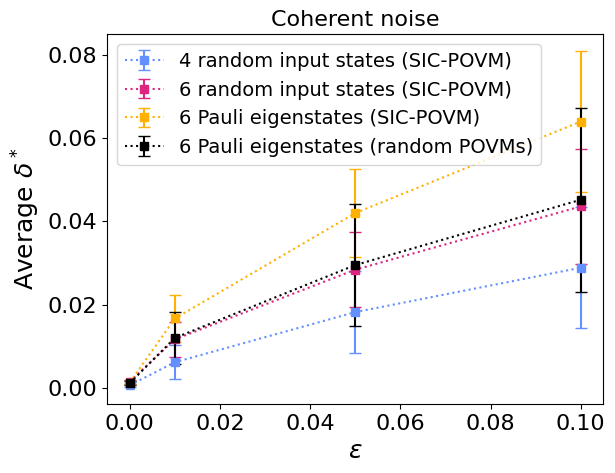

In [22]:
#Generate Figure 3 (right)

p4st = [np.mean(clusterSDP4['SDP']['4random']['coherent'][key]) for key in pvec]
p4st_std = [np.std(clusterSDP4['SDP']['4random']['coherent'][key]) for key in pvec]
p6st = [np.mean(clusterSDP6['SDP']['6random']['coherent'][key]) for key in pvec]
p6st_std = [np.std(clusterSDP6['SDP']['6random']['coherent'][key]) for key in pvec]
pPauli = [np.mean(clusterSDP['SDP']['Pauli']['coherent'][key]) for key in pvec]
pPauli_std = [np.std(clusterSDP['SDP']['Pauli']['coherent'][key]) for key in pvec]
pRandom = [np.mean(clusterSDPrandomPOVM['SDP']['randomPOVM']['coherent'][key]) for key in pvec]
pRandom_std = [np.std(clusterSDPrandomPOVM['SDP']['randomPOVM']['coherent'][key]) for key in pvec]
        
plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states (SIC-POVM)')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states (SIC-POVM)')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates (SIC-POVM)')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates (random POVMs)')

plt.title('Coherent noise')


plt.legend()
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'Average $\delta^*$')

#Save the figure as:
#plt.savefig('delta_av_p_coherent.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Average $\\delta_j^*$ per input state')

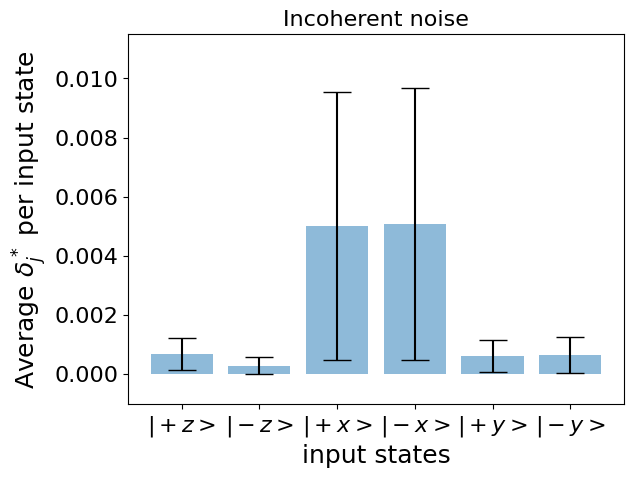

In [23]:
#Generate Figure 4 (left)

vec_mean_incoh = np.mean(manyDeltasDic['incoherent'],axis=0)

plt.bar(np.arange(6), np.mean(vec_mean_incoh,axis=1), yerr=np.std(vec_mean_incoh,axis=1), alpha=0.5, ecolor='black', capsize=10)
plt.xticks(np.arange(6), [r'$|+z>$', r'$|-z>$', r'$|+x>$',r'$|-x>$', r'$|+y>$', r'$|-y>$'])
plt.xlabel('input states')
plt.ylim(-0.001,0.0115)
plt.title('Incoherent noise')
plt.ylabel(r'Average $\delta_j^*$ per input state')

#Save the figure as:
#plt.savefig('incoh_manydeltas.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Average $\\delta_j^*$ per input state')

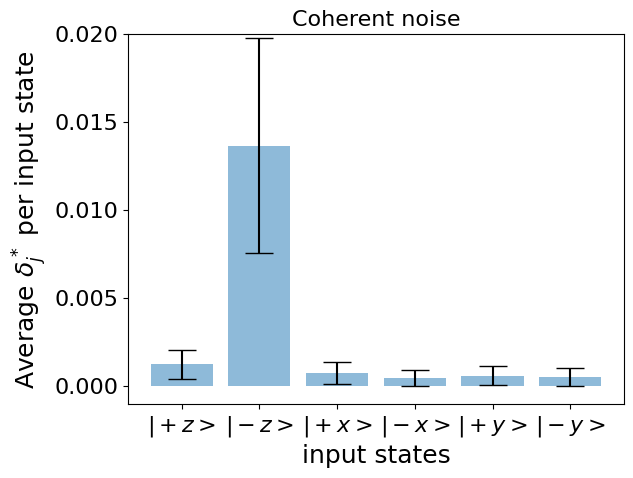

In [24]:
#Generate Figure 4 (right)

vec_mean_coh = np.mean(manyDeltasDic['coherent'],axis=0)

plt.bar(np.arange(6), np.mean(vec_mean_coh,axis=1), yerr=np.std(vec_mean_coh,axis=1), alpha=0.5, ecolor='black', capsize=10)
plt.xticks(np.arange(6), [r'$|+z>$', r'$|-z>$', r'$|+x>$',r'$|-x>$', r'$|+y>$', r'$|-y>$'])
plt.xlabel('input states')
plt.ylim(-0.001,0.020)
plt.title('Coherent noise')
plt.ylabel(r'Average $\delta_j^*$ per input state')

#Save the figure as:
#plt.savefig('coh_manydeltas.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\delta^{(s)}$')

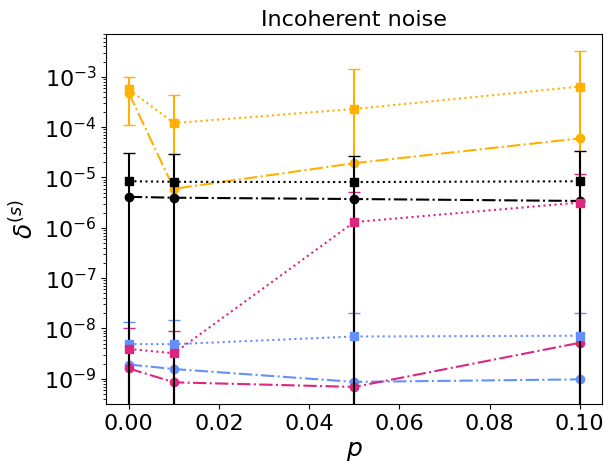

In [50]:
#Generate Figure 5 (left)

pvec = [0.0,0.01,0.05,0.1]

p4st = [np.mean(clusterSeesaw4['seesaw']['4random']['incoherent'][key]) for key in pvec]
p4st_std = [np.std(clusterSeesaw4['seesaw']['4random']['incoherent'][key]) for key in pvec]
p6st = [np.mean(clusterSeesaw6['seesaw']['6random']['incoherent'][key]) for key in pvec]
p6st_std = [np.std(clusterSeesaw6['seesaw']['6random']['incoherent'][key]) for key in pvec]
pPauli = [np.mean(clusterSeesawPauli['seesaw']['Pauli']['incoherent'][key]) for key in pvec]
pPauli_std = [np.std(clusterSeesawPauli['seesaw']['Pauli']['incoherent'][key]) for key in pvec]
pRandom = [np.mean(SeesawRandomDict['seesaw']['randomPOVM']['incoherent'][key]) for key in pvec]
pRandom_std = [np.std(SeesawRandomDict['seesaw']['randomPOVM']['incoherent'][key]) for key in pvec]

plt.plot(pvec,[np.median(clusterSeesawPauli['seesaw']['Pauli']['incoherent'][key]) for key in pvec],color='#ffb000',marker='o',ls = '-.')
plt.plot(pvec,[np.median(clusterSeesaw4['seesaw']['4random']['incoherent'][key]) for key in pvec],color='#648fff',marker='o',ls = '-.')
plt.plot(pvec,[np.median(clusterSeesaw6['seesaw']['6random']['incoherent'][key]) for key in pvec],color='#dc267f',marker='o',ls = '-.')
plt.plot(pvec,[np.median(SeesawRandomDict['seesaw']['randomPOVM']['incoherent'][key]) for key in pvec],color='black',marker='o',ls = '-.')

plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states ')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='Random POVM')

plt.title('Incoherent noise')
plt.yscale('log')

#plt.legend()
plt.xlabel(r'$p$')
plt.ylabel(r'$\delta^{(s)}$')

#Save the figure as:
#plt.savefig('seesaw_p_incoherent.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\delta^{(s)}$')

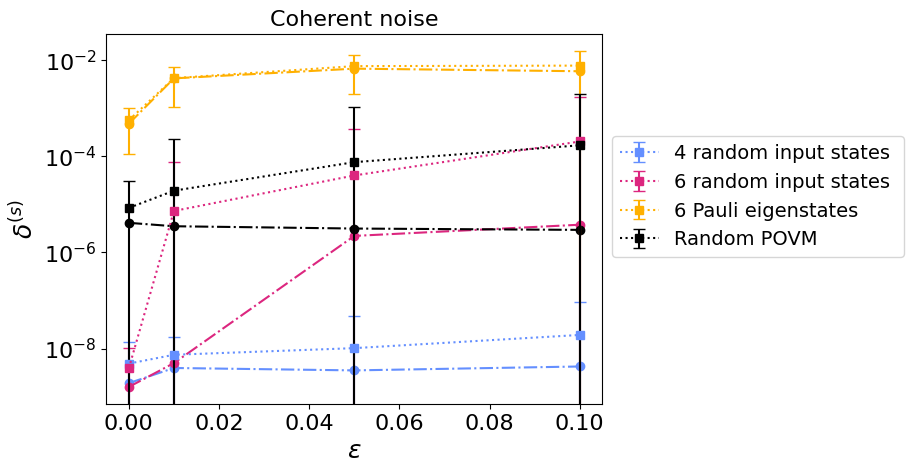

In [51]:
#Generate Figure 5 (right)

pvec = [0.0,0.01,0.05,0.1]

p4st = [np.mean(clusterSeesaw4['seesaw']['4random']['coherent'][key]) for key in pvec]
p4st_std = [np.std(clusterSeesaw4['seesaw']['4random']['coherent'][key]) for key in pvec]
p6st = [np.mean(clusterSeesaw6['seesaw']['6random']['coherent'][key]) for key in pvec]
p6st_std = [np.std(clusterSeesaw6['seesaw']['6random']['coherent'][key]) for key in pvec]
pPauli = [np.mean(clusterSeesawPauli['seesaw']['Pauli']['coherent'][key]) for key in pvec]
pPauli_std = [np.std(clusterSeesawPauli['seesaw']['Pauli']['coherent'][key]) for key in pvec]
pRandom = [np.mean(SeesawRandomDict['seesaw']['randomPOVM']['coherent'][key]) for key in pvec]
pRandom_std = [np.std(SeesawRandomDict['seesaw']['randomPOVM']['coherent'][key]) for key in pvec]

plt.plot(pvec,[np.median(clusterSeesawPauli['seesaw']['Pauli']['coherent'][key]) for key in pvec],color='#ffb000',marker='o',ls = '-.')
plt.plot(pvec,[np.median(clusterSeesaw4['seesaw']['4random']['coherent'][key]) for key in pvec],color='#648fff',marker='o',ls = '-.')
plt.plot(pvec,[np.median(clusterSeesaw6['seesaw']['6random']['coherent'][key]) for key in pvec],color='#dc267f',marker='o',ls = '-.')
plt.plot(pvec,[np.median(SeesawRandomDict['seesaw']['randomPOVM']['coherent'][key]) for key in pvec],color='black',marker='o',ls = '-.')

plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states ')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='Random POVM')

plt.title('Coherent noise')
plt.yscale('log')

plt.legend(bbox_to_anchor=(1.0, 0.75))
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\delta^{(s)}$')

#Save the figure as:
#plt.savefig('seesaw_p_coherent.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Frequency (100 experiments)')

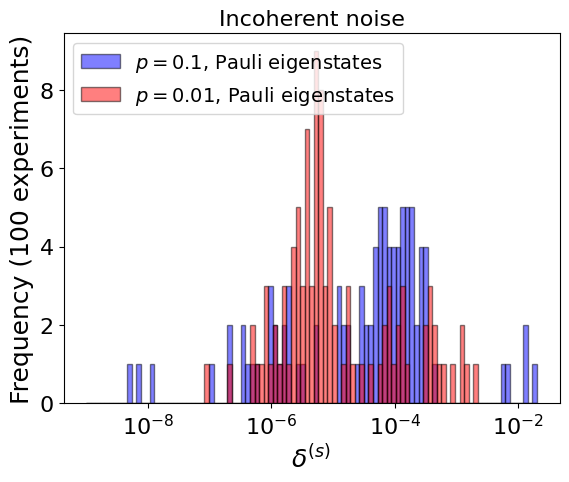

In [27]:
#Generate Figure 6 (left)

binwidth = 0.00001
plt.hist(clusterSeesawPauli['seesaw']['Pauli']['incoherent'][0.1], color = 'blue', alpha=0.5, edgecolor = 'black',
         bins =10 ** np.linspace(np.log10(10e-10), np.log10(0.02), 100), label=r'$p=0.1$, Pauli eigenstates');
plt.hist(clusterSeesawPauli['seesaw']['Pauli']['incoherent'][0.01], color = 'red', alpha=0.5, edgecolor = 'black',
         bins =10 ** np.linspace(np.log10(10e-10), np.log10(0.02), 100), label=r'$p=0.01$, Pauli eigenstates');

plt.legend(loc='upper left')
plt.xscale('log')
plt.title('Incoherent noise')


plt.xlabel(r'$\delta^{(s)}$')
plt.ylabel('Frequency (100 experiments)')

#Save the figure as:
#plt.savefig('seesaw_distribution_incoherent.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Frequency (100 experiments)')

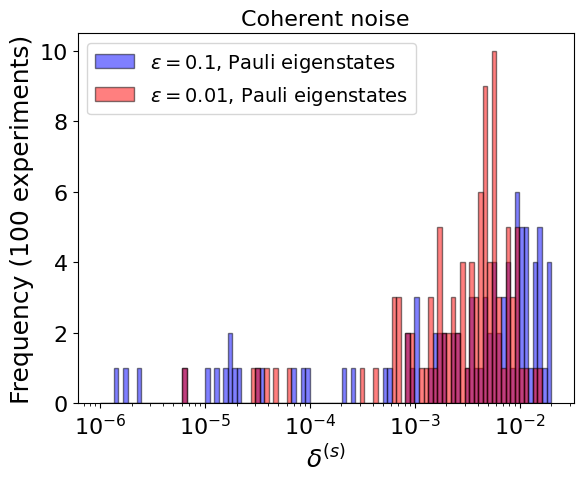

In [28]:
#Generate Figure 6 (right)

binwidth = 0.00001
plt.hist(clusterSeesawPauli['seesaw']['Pauli']['coherent'][0.1], color = 'blue', alpha=0.5, edgecolor = 'black',
         bins =10 ** np.linspace(np.log10(10e-7), np.log10(0.02), 100), label=r'$\epsilon=0.1$, Pauli eigenstates');
plt.hist(clusterSeesawPauli['seesaw']['Pauli']['coherent'][0.01], color = 'red', alpha=0.5, edgecolor = 'black',
         bins =10 ** np.linspace(np.log10(10e-7), np.log10(0.02), 100), label=r'$\epsilon=0.01$, Pauli eigenstates');

plt.legend(loc='upper left')
plt.xscale('log')
plt.title('Coherent noise')


plt.xlabel(r'$\delta^{(s)}$')
#plt.title('4 random input states')
plt.ylabel('Frequency (100 experiments)')

#Save the figure as:
#plt.savefig('seesaw_distribution_coherent.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\delta^{(s)}$')

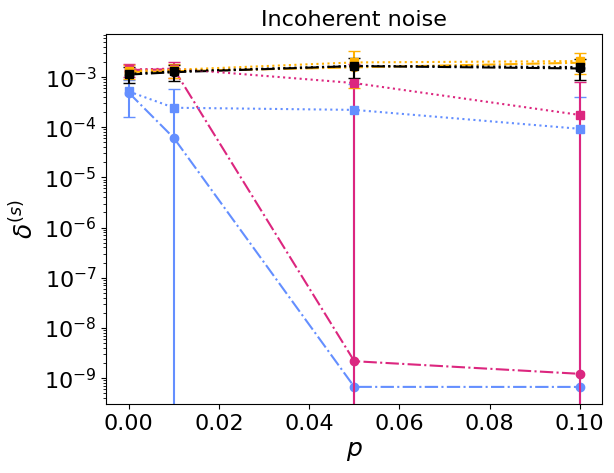

In [49]:
#Generate Figure 7 (left)

pvec = [0.0,0.01,0.05,0.1]

p4st = [np.mean(seesaw_CV_4rand['seesawCV']['4random']['incoherent'][key][:,:,0]) for key in pvec]
p4st_std = [np.std(seesaw_CV_4rand['seesawCV']['4random']['incoherent'][key][:,:,0]) for key in pvec]
p6st = [np.mean(seesaw_CV_6rand['seesawCV']['6random']['incoherent'][key][:,:,0]) for key in pvec]
p6st_std = [np.std(seesaw_CV_6rand['seesawCV']['6random']['incoherent'][key][:,:,0]) for key in pvec]
pPauli = [np.mean(seesaw_CV_pauli['seesawCV']['pauli']['incoherent'][key][:,0]) for key in pvec]
pPauli_std = [np.std(seesaw_CV_pauli['seesawCV']['pauli']['incoherent'][key][:,0]) for key in pvec]
pRandom = [np.mean(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['incoherent'][key][:,:,0]) for key in pvec]
pRandom_std = [np.std(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['incoherent'][key][:,:,0]) for key in pvec]

plt.plot(pvec,[np.median(seesaw_CV_pauli['seesawCV']['pauli']['incoherent'][key][:,0]) for key in pvec],color='#ffb000',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_4rand['seesawCV']['4random']['incoherent'][key][:,:,0]) for key in pvec],color='#648fff',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_6rand['seesawCV']['6random']['incoherent'][key][:,:,0]) for key in pvec],color='#dc267f',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['incoherent'][key][:,:,0]) for key in pvec],color='black',marker='o',ls = '-.')

plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states ')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='Random POVM')

plt.title('Incoherent noise')
plt.yscale('log')

#plt.legend()
plt.xlabel(r'$p$')
plt.ylabel(r'$\delta^{(s)}$')

#Save the figure as:
#plt.savefig('seesawCV_p_incoherent_delta.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\delta^{(s)}$')

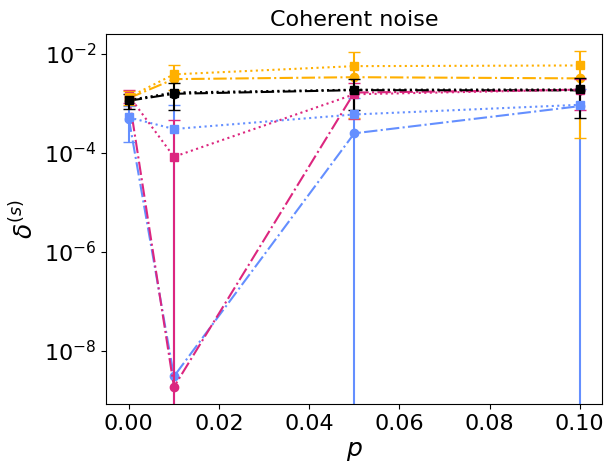

In [48]:
#Generate Figure 7 (right)

pvec = [0.0,0.01,0.05,0.1]

p4st = [np.mean(seesaw_CV_4rand['seesawCV']['4random']['coherent'][key][:,:,0]) for key in pvec]
p4st_std = [np.std(seesaw_CV_4rand['seesawCV']['4random']['coherent'][key][:,:,0]) for key in pvec]
p6st = [np.mean(seesaw_CV_6rand['seesawCV']['6random']['coherent'][key][:,:,0]) for key in pvec]
p6st_std = [np.std(seesaw_CV_6rand['seesawCV']['6random']['coherent'][key][:,:,0]) for key in pvec]
pPauli = [np.mean(seesaw_CV_pauli['seesawCV']['pauli']['coherent'][key][:,0]) for key in pvec]
pPauli_std = [np.std(seesaw_CV_pauli['seesawCV']['pauli']['coherent'][key][:,0]) for key in pvec]
pRandom = [np.mean(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['coherent'][key][:,:,0]) for key in pvec]
pRandom_std = [np.std(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['coherent'][key][:,:,0]) for key in pvec]

plt.plot(pvec,[np.median(seesaw_CV_pauli['seesawCV']['pauli']['coherent'][key][:,0]) for key in pvec],color='#ffb000',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_4rand['seesawCV']['4random']['coherent'][key][:,:,0]) for key in pvec],color='#648fff',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_6rand['seesawCV']['6random']['coherent'][key][:,:,0]) for key in pvec],color='#dc267f',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['coherent'][key][:,:,0]) for key in pvec],color='black',marker='o',ls = '-.')

plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states ')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='Random POVM')

plt.title('Coherent noise')
plt.yscale('log')

#plt.legend()
plt.xlabel(r'$p$')
plt.ylabel(r'$\delta^{(s)}$')

#Save the figure as:
#plt.savefig('seesawCV_p_coherent_delta.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Number of see-saw steps')

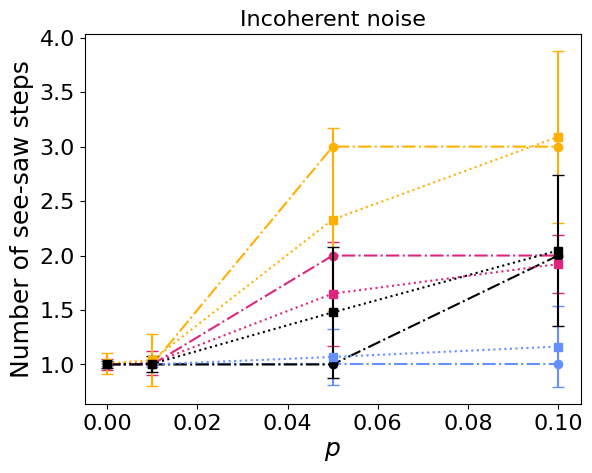

In [47]:
#Generate Figure 8 (left)

pvec = [0.0,0.01,0.05,0.1]

p4st = [np.mean(seesaw_CV_4rand['seesawCV']['4random']['incoherent'][key][:,:,1]) for key in pvec]
p4st_std = [np.std(seesaw_CV_4rand['seesawCV']['4random']['incoherent'][key][:,:,1]) for key in pvec]
p6st = [np.mean(seesaw_CV_6rand['seesawCV']['6random']['incoherent'][key][:,:,1]) for key in pvec]
p6st_std = [np.std(seesaw_CV_6rand['seesawCV']['6random']['incoherent'][key][:,:,1]) for key in pvec]
pPauli = [np.mean(seesaw_CV_pauli['seesawCV']['pauli']['incoherent'][key][:,1]) for key in pvec]
pPauli_std = [np.std(seesaw_CV_pauli['seesawCV']['pauli']['incoherent'][key][:,1]) for key in pvec]
pRandom = [np.mean(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['incoherent'][key][:,:,1]) for key in pvec]
pRandom_std = [np.std(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['incoherent'][key][:,:,1]) for key in pvec]

plt.plot(pvec,[np.median(seesaw_CV_pauli['seesawCV']['pauli']['incoherent'][key][:,1]) for key in pvec],color='#ffb000',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_4rand['seesawCV']['4random']['incoherent'][key][:,:,1]) for key in pvec],color='#648fff',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_6rand['seesawCV']['6random']['incoherent'][key][:,:,1]) for key in pvec],color='#dc267f',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['incoherent'][key][:,:,1]) for key in pvec],color='black',marker='o',ls = '-.')

plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states ')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='Random POVM')

plt.title('Incoherent noise')

#plt.legend()
plt.xlabel(r'$p$')
plt.ylabel(r'Number of see-saw steps')

#Save the figure as:
#plt.savefig('seesawCV_p_incoherent_n.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Number of see-saw steps')

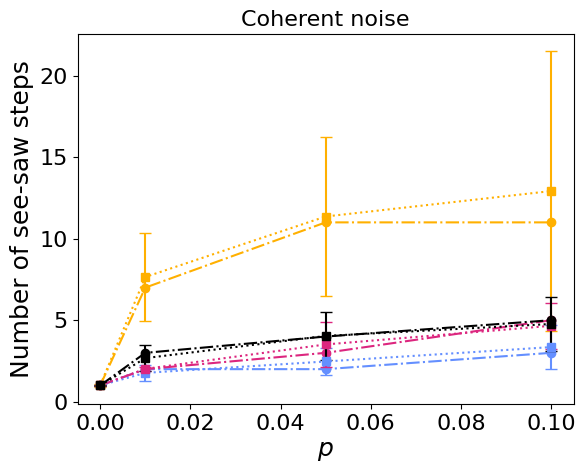

In [52]:
#Generate Figure 8 (right)

pvec = [0.0,0.01,0.05,0.1]

p4st = [np.mean(seesaw_CV_4rand['seesawCV']['4random']['coherent'][key][:,:,1]) for key in pvec]
p4st_std = [np.std(seesaw_CV_4rand['seesawCV']['4random']['coherent'][key][:,:,1]) for key in pvec]
p6st = [np.mean(seesaw_CV_6rand['seesawCV']['6random']['coherent'][key][:,:,1]) for key in pvec]
p6st_std = [np.std(seesaw_CV_6rand['seesawCV']['6random']['coherent'][key][:,:,1]) for key in pvec]
pPauli = [np.mean(seesaw_CV_pauli['seesawCV']['pauli']['coherent'][key][:,1]) for key in pvec]
pPauli_std = [np.std(seesaw_CV_pauli['seesawCV']['pauli']['coherent'][key][:,1]) for key in pvec]
pRandom = [np.mean(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['coherent'][key][:,:,1]) for key in pvec]
pRandom_std = [np.std(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['coherent'][key][:,:,1]) for key in pvec]

plt.plot(pvec,[np.median(seesaw_CV_pauli['seesawCV']['pauli']['coherent'][key][:,1]) for key in pvec],color='#ffb000',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_4rand['seesawCV']['4random']['coherent'][key][:,:,1]) for key in pvec],color='#648fff',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_6rand['seesawCV']['6random']['coherent'][key][:,:,1]) for key in pvec],color='#dc267f',marker='o',ls = '-.')
plt.plot(pvec,[np.median(seesaw_CV_randomPOVM['seesawCV']['randomPOVM']['coherent'][key][:,:,1]) for key in pvec],color='black',marker='o',ls = '-.')

plt.errorbar(pvec,p4st,p4st_std,color='#648fff',marker='s',capsize=4,ls=':',label='4 random input states ')
plt.errorbar(pvec,p6st,p6st_std,color='#dc267f',marker='s',capsize=4,ls=':',label='6 random input states')
plt.errorbar(pvec,pPauli,pPauli_std,color='#ffb000',marker='s',capsize=4,ls=':',label='6 Pauli eigenstates')
plt.errorbar(pvec,pRandom,pRandom_std,color='black',marker='s',capsize=4,ls=':',label='Random POVM')

plt.title('Coherent noise')

#plt.legend()
plt.xlabel(r'$p$')
plt.ylabel(r'Number of see-saw steps')

#Save the figure as:
#plt.savefig('seesawCV_p_coherent_n.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\tau$')

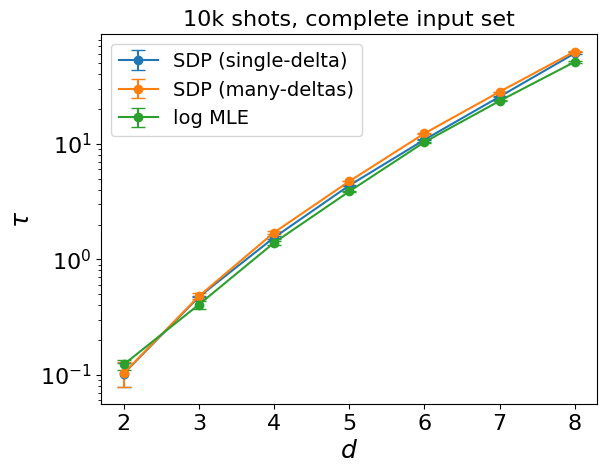

In [30]:
#Generate Figure 9 (upper left)

plt.errorbar(range(2,9),[dim10_com[jj]['singleDelta']['timeMean'] for jj in range(7)],[dim10_com[jj]['singleDelta']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim10_com[jj]['norm']['timeMean'] for jj in range(7)],[dim10_com[jj]['norm']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim10_com[jj]['logMLE']['timeMean'] for jj in range(7)],[dim10_com[jj]['logMLE']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')
plt.yscale('log')


plt.title('10k shots, complete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'$\tau$')

#Save the figure as:
#plt.savefig('10comTime.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\tau$')

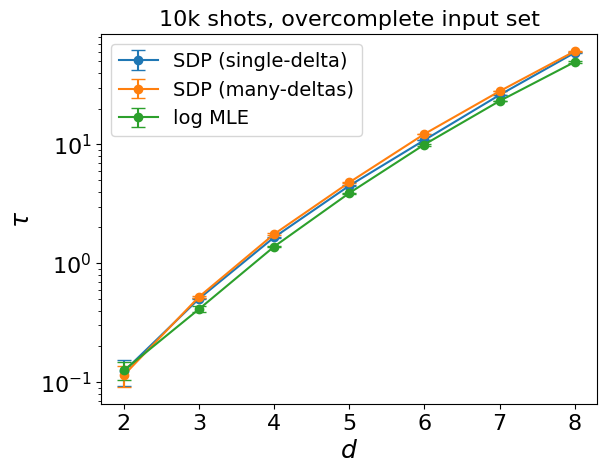

In [31]:
#Generate Figure 9 (lower left)

plt.errorbar(range(2,9),[dim10_Ovcom[jj]['singleDelta']['timeMean'] for jj in range(7)],[dim10_Ovcom[jj]['singleDelta']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim10_Ovcom[jj]['norm']['timeMean'] for jj in range(7)],[dim10_Ovcom[jj]['norm']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim10_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)],[dim10_Ovcom[jj]['logMLE']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')
plt.yscale('log')


plt.title('10k shots, overcomplete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'$\tau$')

#Save the figure as:
#plt.savefig('10OvcomTime.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\tau$')

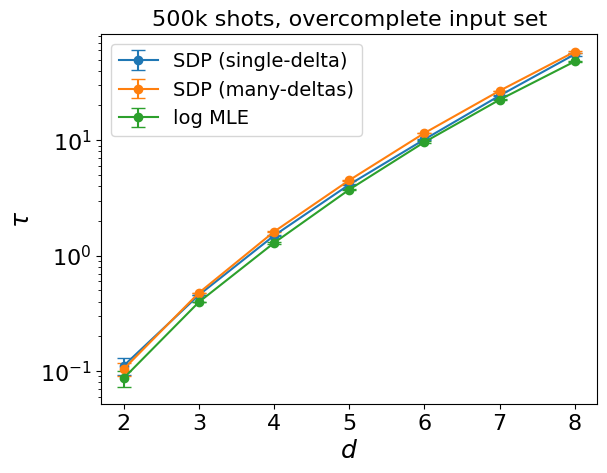

In [32]:
#Generate Figure 9 (lower right)

plt.errorbar(range(2,9),[dim500_Ovcom[jj]['singleDelta']['timeMean'] for jj in range(7)],[dim500_Ovcom[jj]['singleDelta']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim500_Ovcom[jj]['norm']['timeMean'] for jj in range(7)],[dim500_Ovcom[jj]['norm']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)],[dim500_Ovcom[jj]['logMLE']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')
plt.yscale('log')


plt.title('500k shots, overcomplete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'$\tau$')

#Save the figure as:
#plt.savefig('500OvcomTime.pdf',bbox_inches='tight') 

Text(0, 0.5, '$\\tau$')

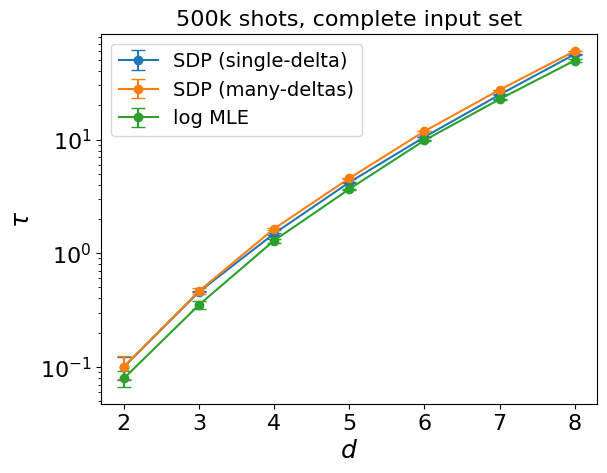

In [33]:
#Generate Figure 9 (upper right)

plt.errorbar(range(2,9),[dim500_com[jj]['singleDelta']['timeMean'] for jj in range(7)],[dim500_com[jj]['singleDelta']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim500_com[jj]['norm']['timeMean'] for jj in range(7)],[dim500_com[jj]['norm']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim500_com[jj]['logMLE']['timeMean'] for jj in range(7)],[dim500_com[jj]['logMLE']['timeStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')
plt.yscale('log')


plt.title('500k shots, complete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'$\tau$')

#Save the figure as:
#plt.savefig('500comTime.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Average trace distance')

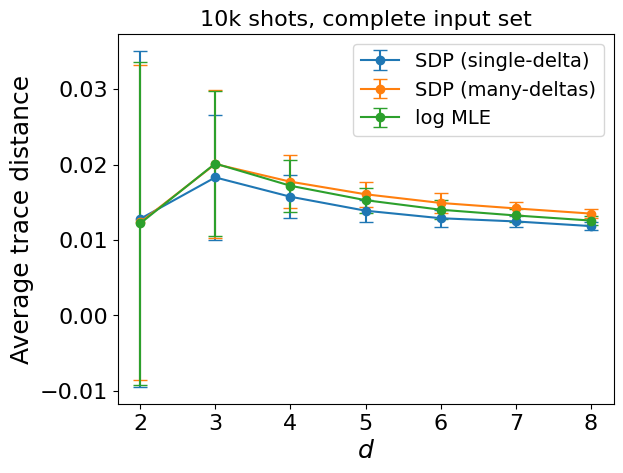

In [34]:
#Generate Figure 10 (upper left)

plt.errorbar(range(2,9),[dim10_com[jj]['singleDelta']['vecMean'] for jj in range(7)],[dim10_com[jj]['singleDelta']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim10_com[jj]['norm']['vecMean'] for jj in range(7)],[dim10_com[jj]['norm']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim10_com[jj]['logMLE']['vecMean'] for jj in range(7)],[dim10_com[jj]['logMLE']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')

plt.title('10k shots, complete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'Average trace distance')

#Save the figure as:
#plt.savefig('10comTrace.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Average trace distance')

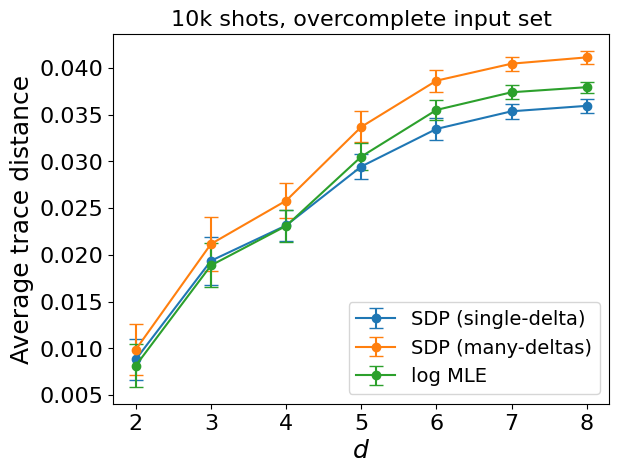

In [35]:
#Generate Figure 10 (lower left)

plt.errorbar(range(2,9),[dim10_Ovcom[jj]['singleDelta']['vecMean'] for jj in range(7)],[dim10_Ovcom[jj]['singleDelta']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim10_Ovcom[jj]['norm']['vecMean'] for jj in range(7)],[dim10_Ovcom[jj]['norm']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim10_Ovcom[jj]['logMLE']['vecMean'] for jj in range(7)],[dim10_Ovcom[jj]['logMLE']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')

plt.title('10k shots, overcomplete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'Average trace distance')

#Save the figure as:
#plt.savefig('10OvcomTrace.pdf',bbox_inches='tight') 

Text(0, 0.5, 'Average trace distance')

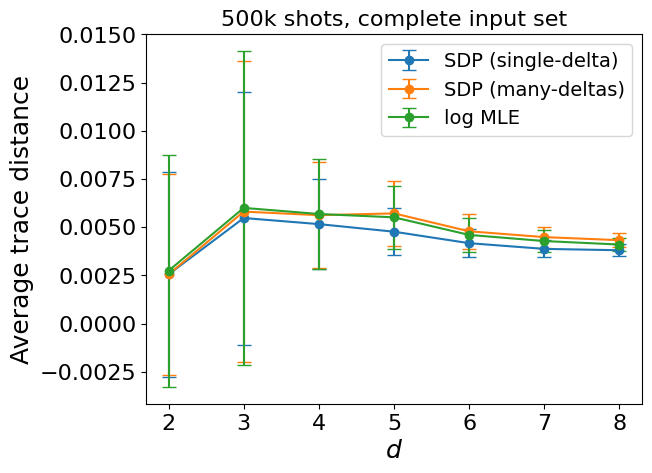

In [36]:
#Generate Figure 10 (upper right)

plt.errorbar(range(2,9),[dim500_com[jj]['singleDelta']['vecMean'] for jj in range(7)],[dim500_com[jj]['singleDelta']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim500_com[jj]['norm']['vecMean'] for jj in range(7)],[dim500_com[jj]['norm']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim500_com[jj]['logMLE']['vecMean'] for jj in range(7)],[dim500_com[jj]['logMLE']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')


plt.title('500k shots, complete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'Average trace distance')

#Save the figure as:
#plt.savefig('500comTrace.pdf',bbox_inches='tight')

Text(0, 0.5, 'Average trace distance')

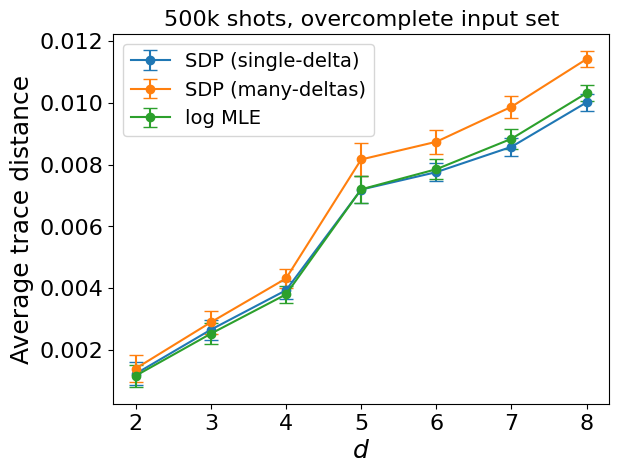

In [40]:
#Generate Figure 10 (lower right)

plt.errorbar(range(2,9),[dim500_Ovcom[jj]['singleDelta']['vecMean'] for jj in range(7)],[dim500_Ovcom[jj]['singleDelta']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (single-delta)')
plt.errorbar(range(2,9),[dim500_Ovcom[jj]['norm']['vecMean'] for jj in range(7)],[dim500_Ovcom[jj]['norm']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='SDP (many-deltas)')
plt.errorbar(range(2,9),[dim500_Ovcom[jj]['logMLE']['vecMean'] for jj in range(7)],[dim500_Ovcom[jj]['logMLE']['vecStd'] for jj in range(7)],marker='o', capsize=5,label='log MLE')


plt.title('500k shots, overcomplete input set')
plt.legend()
plt.xlabel(r'$d$')
plt.ylabel(r'Average trace distance')

#Save the figure as:
#plt.savefig('500OvcomTrace.pdf',bbox_inches='tight') 

In [38]:
# You can use the following code to fit the curves in Fig. 9 to a n-degree polynomial

degree = 7
rangeVec = range(2,9)
fitCoeff = np.polynomial.polynomial.Polynomial.fit(rangeVec,[dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)],degree).convert().coef
fitVector7 = np.zeros(7)
for jj in range(7):
    for kk in range(degree+1):
        fitVector7[jj]+=fitCoeff[kk]*np.power(rangeVec[jj],kk)

degree = 5
rangeVec = range(2,9)
fitCoeff = np.polynomial.polynomial.Polynomial.fit(rangeVec,[dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)],degree).convert().coef
fitVector5 = np.zeros(7)
for jj in range(7):
    for kk in range(degree+1):
        fitVector5[jj]+=fitCoeff[kk]*np.power(rangeVec[jj],kk)
        
degree = 4
rangeVec = range(2,9)
fitCoeff = np.polynomial.polynomial.Polynomial.fit(rangeVec,[dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)],degree).convert().coef
fitVector4 = np.zeros(7)
for jj in range(7):
    for kk in range(degree+1):
        fitVector4[jj]+=fitCoeff[kk]*np.power(rangeVec[jj],kk)
        
degree = 6
rangeVec = range(2,9)
fitCoeff = np.polynomial.polynomial.Polynomial.fit(rangeVec,[dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)],degree).convert().coef
fitVector6 = np.zeros(7)
for jj in range(7):
    for kk in range(degree+1):
        fitVector6[jj]+=fitCoeff[kk]*np.power(rangeVec[jj],kk)

/Users/marcocattaneo/mambaforge/envs/nbenv/lib/python3.10/site-packages/numpy/polynomial/polynomial.py:1362: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


In [39]:
# Check the accuracy the the polynomial fit

print([dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)]-fitVector4) # degree 4
print([dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)]-fitVector5) # degree 5
print([dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)]-fitVector6) # degree 6
print([dim500_Ovcom[jj]['logMLE']['timeMean'] for jj in range(7)]-fitVector7) # degree 7

[-0.01921481  0.0758568  -0.09106189 -0.01002431  0.10609835 -0.08187139
  0.02021724]
[ 0.00050122 -0.00300729  0.00751823 -0.01002431  0.00751823 -0.00300729
  0.00050122]
[ 1.88321581e-14 -1.66533454e-16 -4.66293670e-15 -1.24344979e-14
 -5.32907052e-15 -5.32907052e-14 -1.13686838e-13]
[ 1.77219350e-14  3.92463839e-14  6.19504448e-14  1.24344979e-13
  2.07833750e-13 -6.75015599e-14  1.70530257e-13]
